In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
df = pd.read_excel("./online_retail_data.xlsx",sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

In [8]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [9]:
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


## StockCode
Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

In [11]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


I think we have to assume that these are genuine, the "45864P" types. But neverthless,let's look at any other StockCode present.

In [12]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


So quite a lot of them that don't follow our expected patterns.

In [13]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

# Data Cleaning

In [14]:
cleaned_df = df.copy()

In [15]:
# Invoice 
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}') == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [16]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

mask = (
    (cleaned_df['StockCode'].str.match('^\\d{5}$') == True)              # exactly 5 digits
    | (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True)   # 5 digits long followed by letters
    | (cleaned_df['StockCode'].str.match('^PADS$') == True)              
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


For "Customer ID",we got quite a lot of Null values,and there is no way we can get those values or impute them,so we have to drop them.

In [17]:
cleaned_df.dropna(subset = ['Customer ID'],inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_19352\3344896822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset = ['Customer ID'],inplace= True)


In [18]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


So, we were hoping that negative "Quantity" will automatically get resolved and we can see that above,but our price still got "zero".

In [19]:
len(cleaned_df[cleaned_df['Price'] == 0])

28

A very small set and I don't think zero priced item should be included in the analysis,so we will drop them.

In [20]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [21]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


Although we got some some very small prices, we will take them in.

In [22]:
len(cleaned_df)/len(df)

0.7732429238325965

**So we dropped around 22 % of our data**. <br>
This is often asked by the clients in the real world.

# Feature Engineering

1. Recency
2. Frequency
3. Monetary Value
4. SalesLineTotal

In [23]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']
cleaned_df

C:\Users\HP\AppData\Local\Temp\ipykernel_19352\3511970235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [25]:
aggregated_df = cleaned_df.groupby(by='Customer ID',as_index=False) \
    .agg(
        MonetaryValue = ('SalesLineTotal','sum'),
        Frequency = ('Invoice','nunique'),
        LastInvoice = ('InvoiceDate','max') 
    )

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoice
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
5,12352.0,343.80,2,2010-11-29 10:07:00
6,12353.0,317.76,1,2010-10-27 12:44:00
7,12355.0,488.21,1,2010-05-21 11:59:00
8,12356.0,3126.25,3,2010-11-24 12:24:00
9,12357.0,11229.99,1,2010-11-16 10:05:00


In [26]:
max_invoice_date = aggregated_df['LastInvoice'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [27]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoice']).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


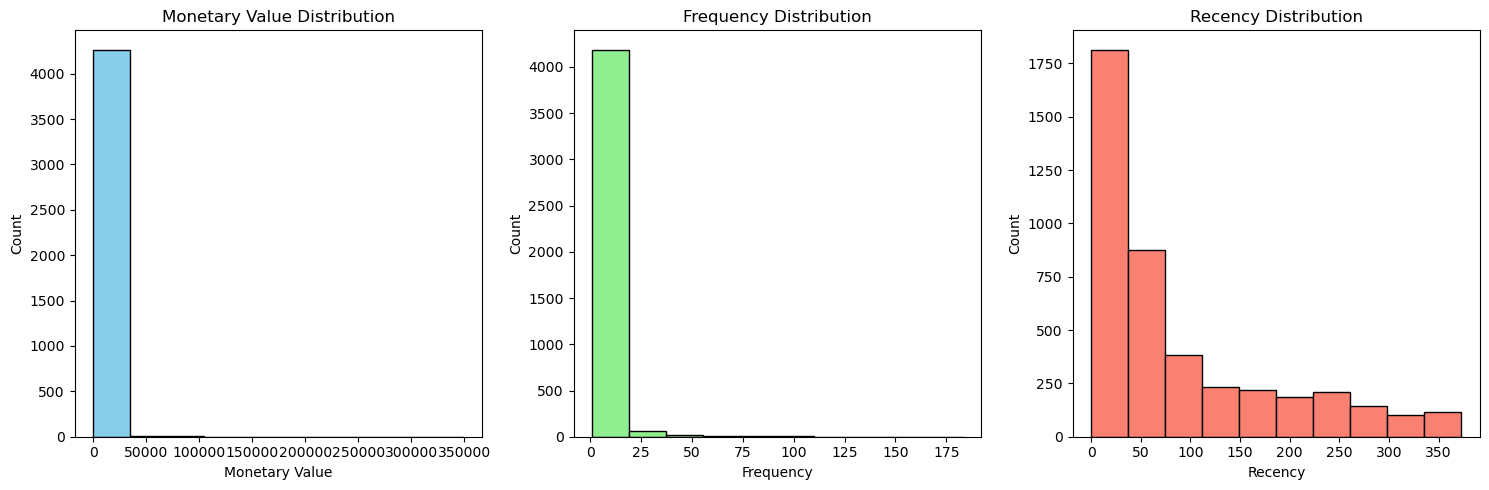

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'],bins = 10,color = 'skyblue',edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins = 10,color = 'lightgreen',edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins = 10,color = 'salmon',edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

So really skewed distribution for the first two plots. So let us look at the boxplots for outlier.

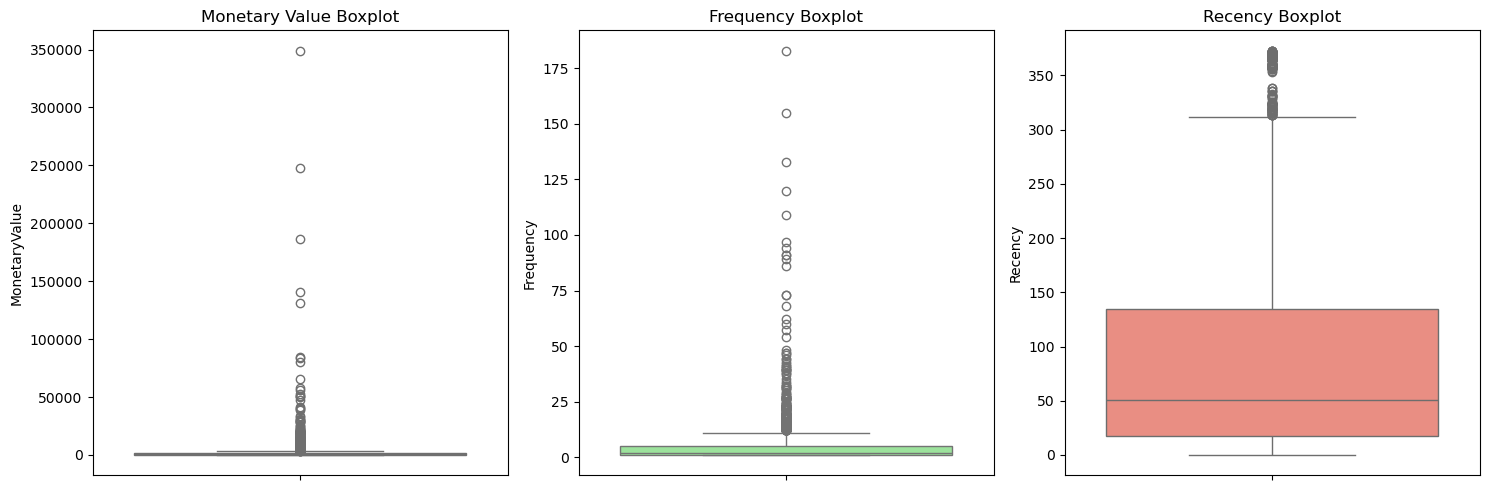

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'],color = 'skyblue')
plt.title('Monetary Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'],color = 'lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

That's very interesting,so we will seperate out the outlier data for further analysis but won't include that in the clustering.

In [35]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

# seperating outlier
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + M_IQR*1.25)) | 
                                    (aggregated_df['MonetaryValue'] < (M_Q1 - M_IQR*1.25))].copy()
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,469.000000,469.000000,469.000000,469,469.000000
mean,15102.692964,11347.057136,16.243070,2010-11-08 20:10:57.697228288,30.714286
min,12357.000000,3450.280000,1.000000,2009-12-10 18:03:00,0.000000
25%,13629.000000,4274.940000,7.000000,2010-11-07 13:50:00,4.000000
50%,15005.000000,5854.840000,12.000000,2010-11-25 14:57:00,14.000000
75%,16636.000000,9529.860000,18.000000,2010-12-05 15:47:00,32.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1719.884507,24661.098709,18.988879,NaN,51.073178


In [36]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

# seperating outlier
frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + F_IQR*1.25)) | 
                                    (aggregated_df['Frequency'] < (F_Q1 - F_IQR*1.25))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,329.00000,329.000000,329.000000,329,329.000000
mean,15344.12766,12855.607374,21.863222,2010-11-23 07:37:57.811549952,16.237082
min,12417.00000,1094.390000,11.000000,2010-05-12 16:51:00,0.000000
25%,13798.00000,3972.760000,12.000000,2010-11-21 10:38:00,2.000000
50%,15498.00000,5921.650000,15.000000,2010-12-01 17:24:00,8.000000
75%,16839.00000,10665.690000,22.000000,2010-12-07 09:55:00,18.000000
max,18260.00000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1743.38358,29135.307056,20.710758,NaN,26.190176


In [41]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) &
                               (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency
count,3751.000000,3751.000000,3751.000000,3751,3751.000000
mean,15379.977073,849.890356,2.785657,2010-09-02 11:17:21.466275584,98.081578
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13915.500000,275.425000,1.000000,2010-07-07 09:40:00,22.000000
50%,15390.000000,570.660000,2.000000,2010-10-12 10:44:00,58.000000
75%,16862.500000,1224.880000,4.000000,2010-11-17 10:06:30,155.000000
max,18287.000000,3424.020000,10.000000,2010-12-09 20:01:00,373.000000
std,1693.978930,767.495602,2.134895,NaN,98.386906


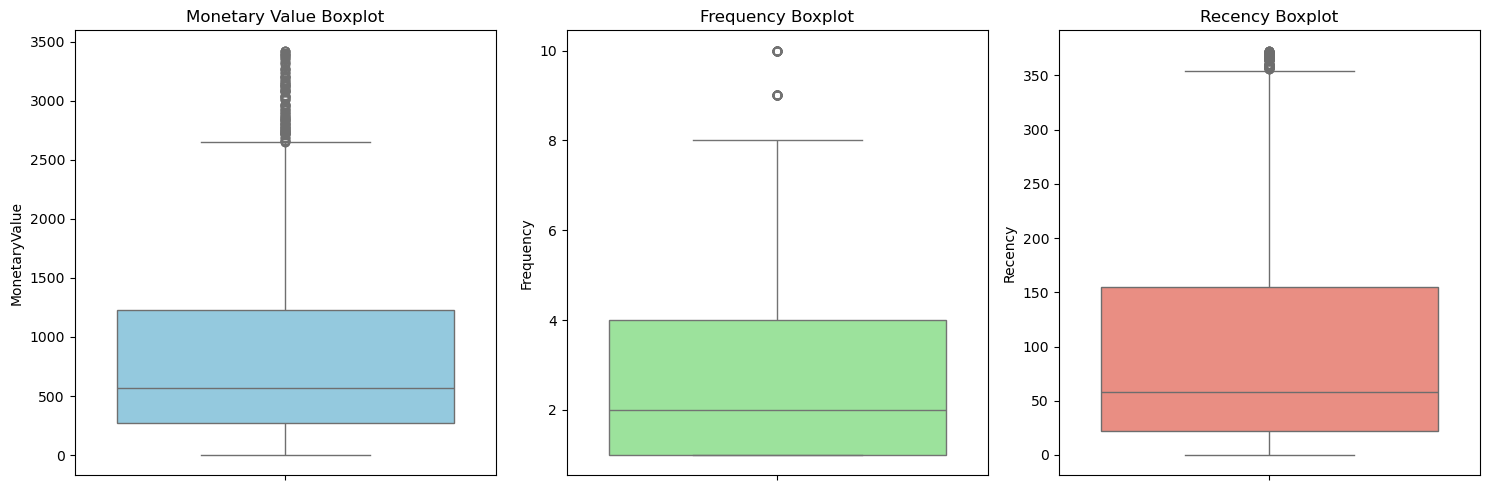

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['MonetaryValue'],color = 'skyblue')
plt.title('Monetary Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'],color = 'lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

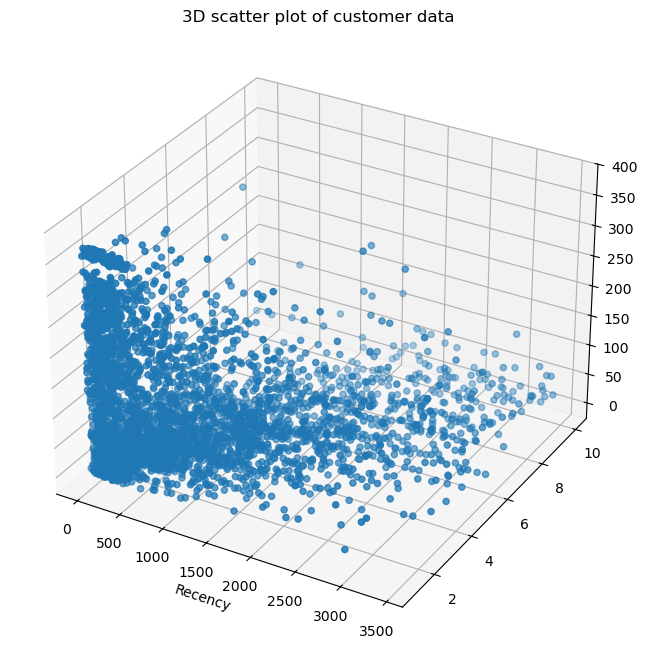

In [ ]:
# 3-D plot
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency']
                     )

ax.set_xlabel('Monetary Value')
ax.set_xlabel('Frequency')
ax.set_xlabel('Recency')

ax.set_title('3D scatter plot of customer data')
plt.show()

You can already see the different scales of the axis,and the K-means clustering algorithm is really sensitive wrt scales. So we will need to do some scaling,we will use standard scaling.

In [44]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(outliers_cluster_df[['MonetaryValue','Frequency','Recency']])
scaled_data 

array([[-0.8868078 , -0.3680564 ,  0.67008114],
       [ 0.61693222, -0.3680564 , -0.97669896],
       [-0.81930656, -0.83652588, -0.254962  ],
       ...,
       [-0.61622947, -0.83652588,  2.00173666],
       [ 0.51673588, -0.3680564 ,  0.13131975],
       [ 1.88406605,  0.56888256, -0.82421932]])

In [47]:
scaled_data_df = pd.DataFrame(scaled_data,index = non_outliers_df.index,columns = ('MonetaryValue','Frequency','Recency'))
scaled_data_df 

,MonetaryValue,Frequency,Recency
0,-0.886808,-0.368056,0.670081
1,0.616932,-0.368056,-0.976699
2,-0.819307,-0.836526,-0.254962
3,1.786893,-0.368056,-0.570087
4,-0.715357,-0.836526,-0.895376
...,...,...,...
4280,-0.271204,1.505822,-0.824219
4281,-0.571038,-0.836526,-0.326119
4282,-0.616229,-0.836526,2.001737
4283,0.516736,-0.368056,0.131320


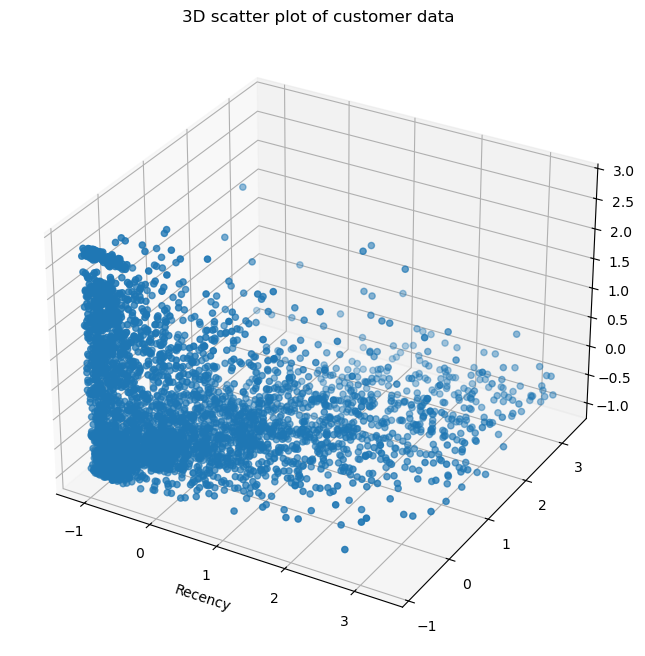

In [48]:
# 3-D plot after scaling the data
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency']
                     )

ax.set_xlabel('Monetary Value')
ax.set_xlabel('Frequency')
ax.set_xlabel('Recency')

ax.set_title('3D scatter plot of customer data')
plt.show()

# K-Means Clutering

- The number of clusters are determined by the number of centroids.
- To determine the appropriate number of centroids,we want to find the points where these centres are stable.
- We want the avg vector distance between the centroid and the data points to be minimised,this distance is commonly known as **inertia**

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


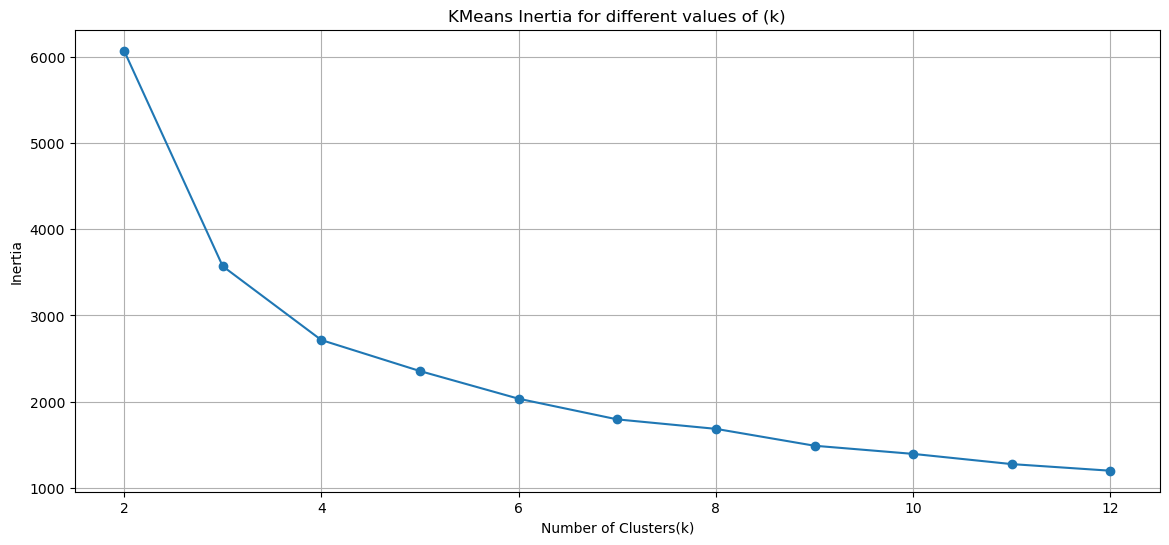

In [50]:
max_k = 12 # max number of clusters we are trying
inertia = []
k_values = range(2,max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Looking at the graph(elbow method), it looks like we get stablity for k between 4 and 5. But we will check one more metric, **Silhouette Score.** 

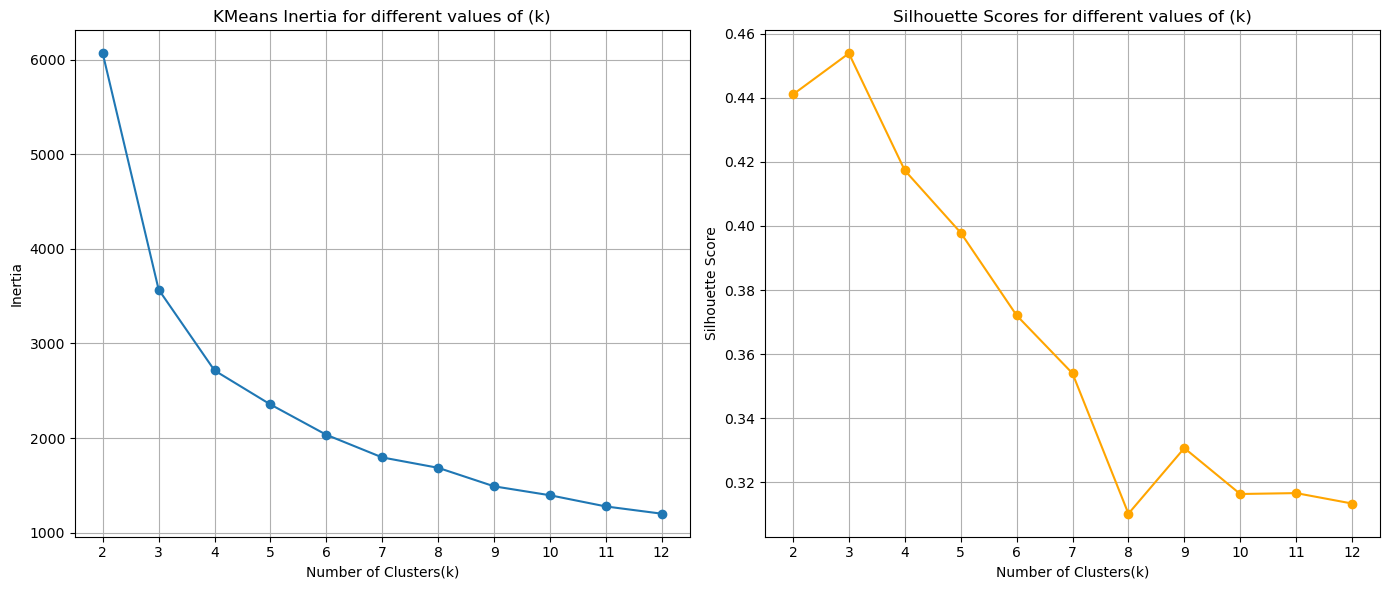

In [52]:
max_k = 12 # max number of clusters we are trying
inertia = []
silhouette_scores = []
k_values = range(2,max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores,marker='o',color = 'orange')
plt.title('Silhouette Scores for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

We will use k=4 over k=5,and generally using less clusters is good because then it minimises the number of clusetrs you need to seperately analyse. It's a tradeoff.

In [53]:
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 3, ..., 1, 0, 0])

In [54]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

C:\Users\HP\AppData\Local\Temp\ipykernel_19352\395619450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,3
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


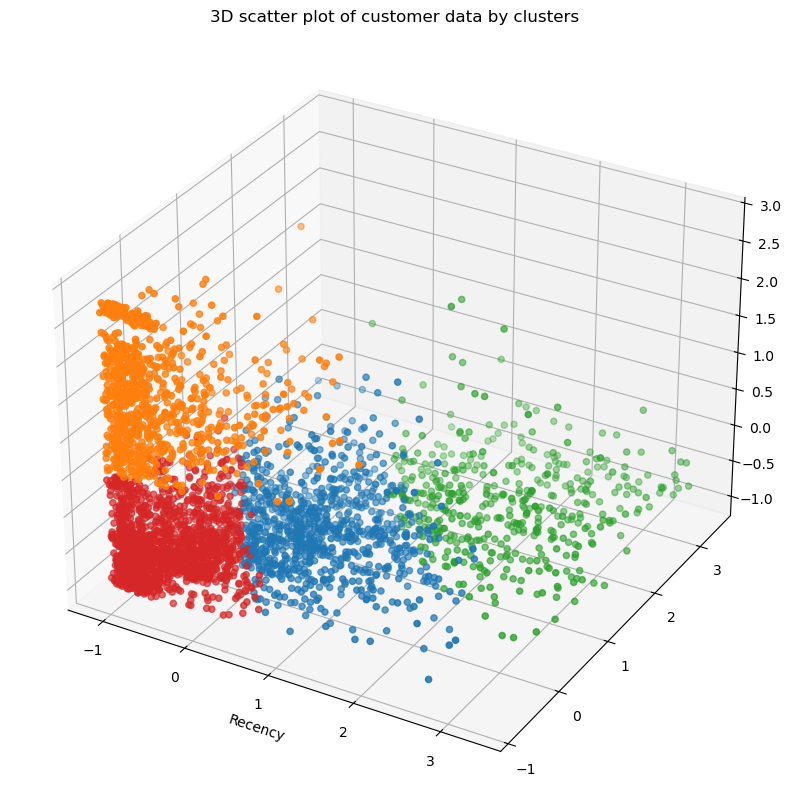

In [55]:
# visualising the different clusters
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency'],
                     c = colors,
                     marker = 'o'
                     )

ax.set_xlabel('Monetary Value')
ax.set_xlabel('Frequency')
ax.set_xlabel('Recency')

ax.set_title('3D scatter plot of customer data by clusters')
plt.show()

# Cluster Analysis

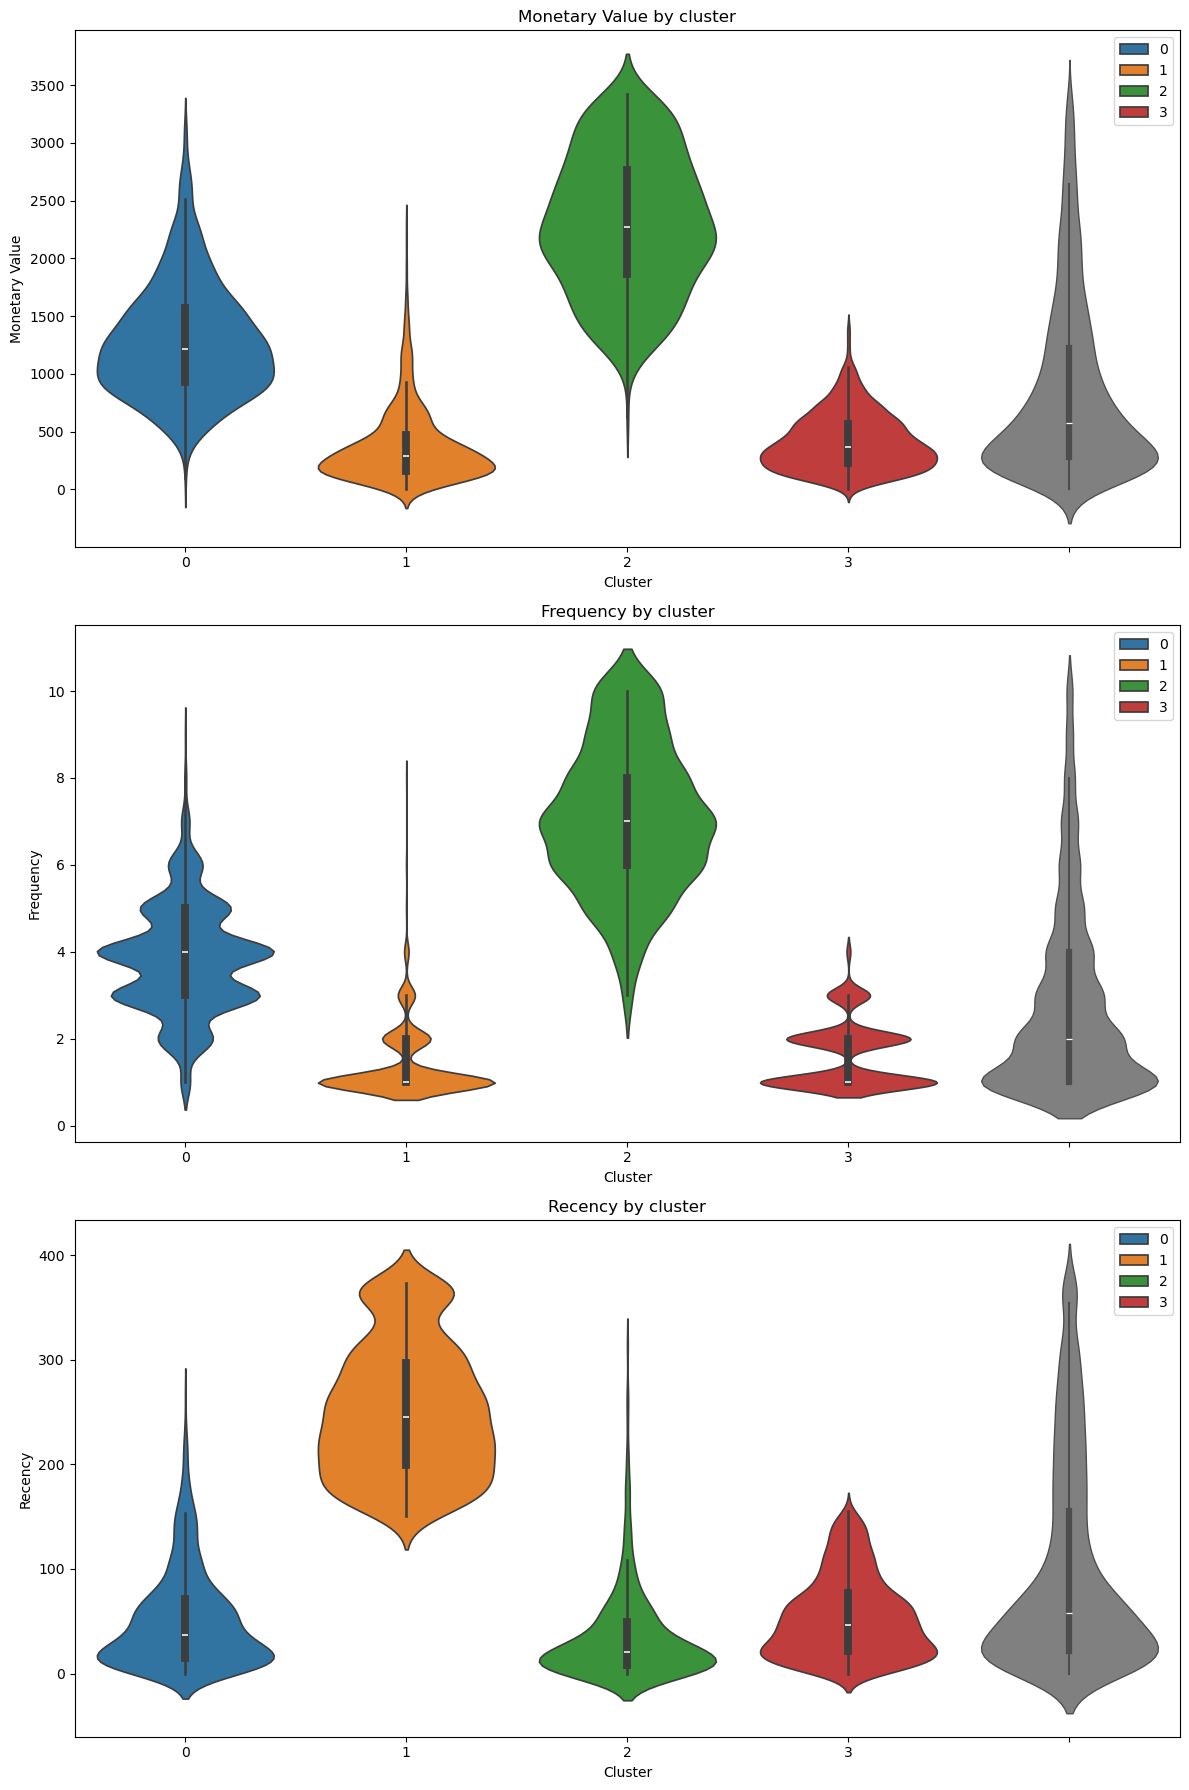

In [57]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['MonetaryValue'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['MonetaryValue'],color = 'gray',linewidth=1.0) # for refernce
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['Frequency'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Frequency'],color = 'gray',linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['Recency'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Recency'],color = 'gray',linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()



- **Cluster 0 (Blue): 'Retain'**
    1. Rationale: This cluster represents high-value customers who purchase regularly, thpugh not always recently. The focus should be retention efforts to maintain their loyalty and spending levels.
    2. Action: Implement loyalty programs,personalised offers,and regular engagement to ensure they remain active.

- **Cluster 1 (Orange): 'Re-enagage'**
    1. Rationale: This cluster represents low-value and infrequent customers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behaviour.
    2. Action: Use targeted marketing campaigns,special discounts,or reminders to encourage them to return and purcahse again.

- **Cluster 2 (Green): 'Nurture'**
    1. Rationale: This cluster represents the least active and lowest value customer but they have made purchases recently. This customer is maybe new or needs nurturing to increase their engagement.
    2. Action: Focus on building relationships,providing excellent customer service,and offering incentives to encourage more frequent purchases.

- **Cluster 3 (Red): 'Reward'**
    1. Rationale: This cluster includes high value,very frequent buyers,many of whom are still actively purchasing. They are your most loyal customers,and rewarding their loyalty is key to maintaining their engagement.
    2. Action: Implement a robust loyalty program,provide exclusive offers and recognise their loyalty to keep them engaged and satsfied.

# Outlier Analysis


In [58]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  61,   65,   84,   85,   86,   92,  126,  145,  164,  179,
       ...
       4129, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4250, 4262],
      dtype='int64', length=264)

In [59]:
# Creating three new clusters
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = monetary_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outliers_cluster_df = pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])

outliers_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
60,12429.0,3591.51,5,2010-12-09 12:05:00,0,-1
...,...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14,-3


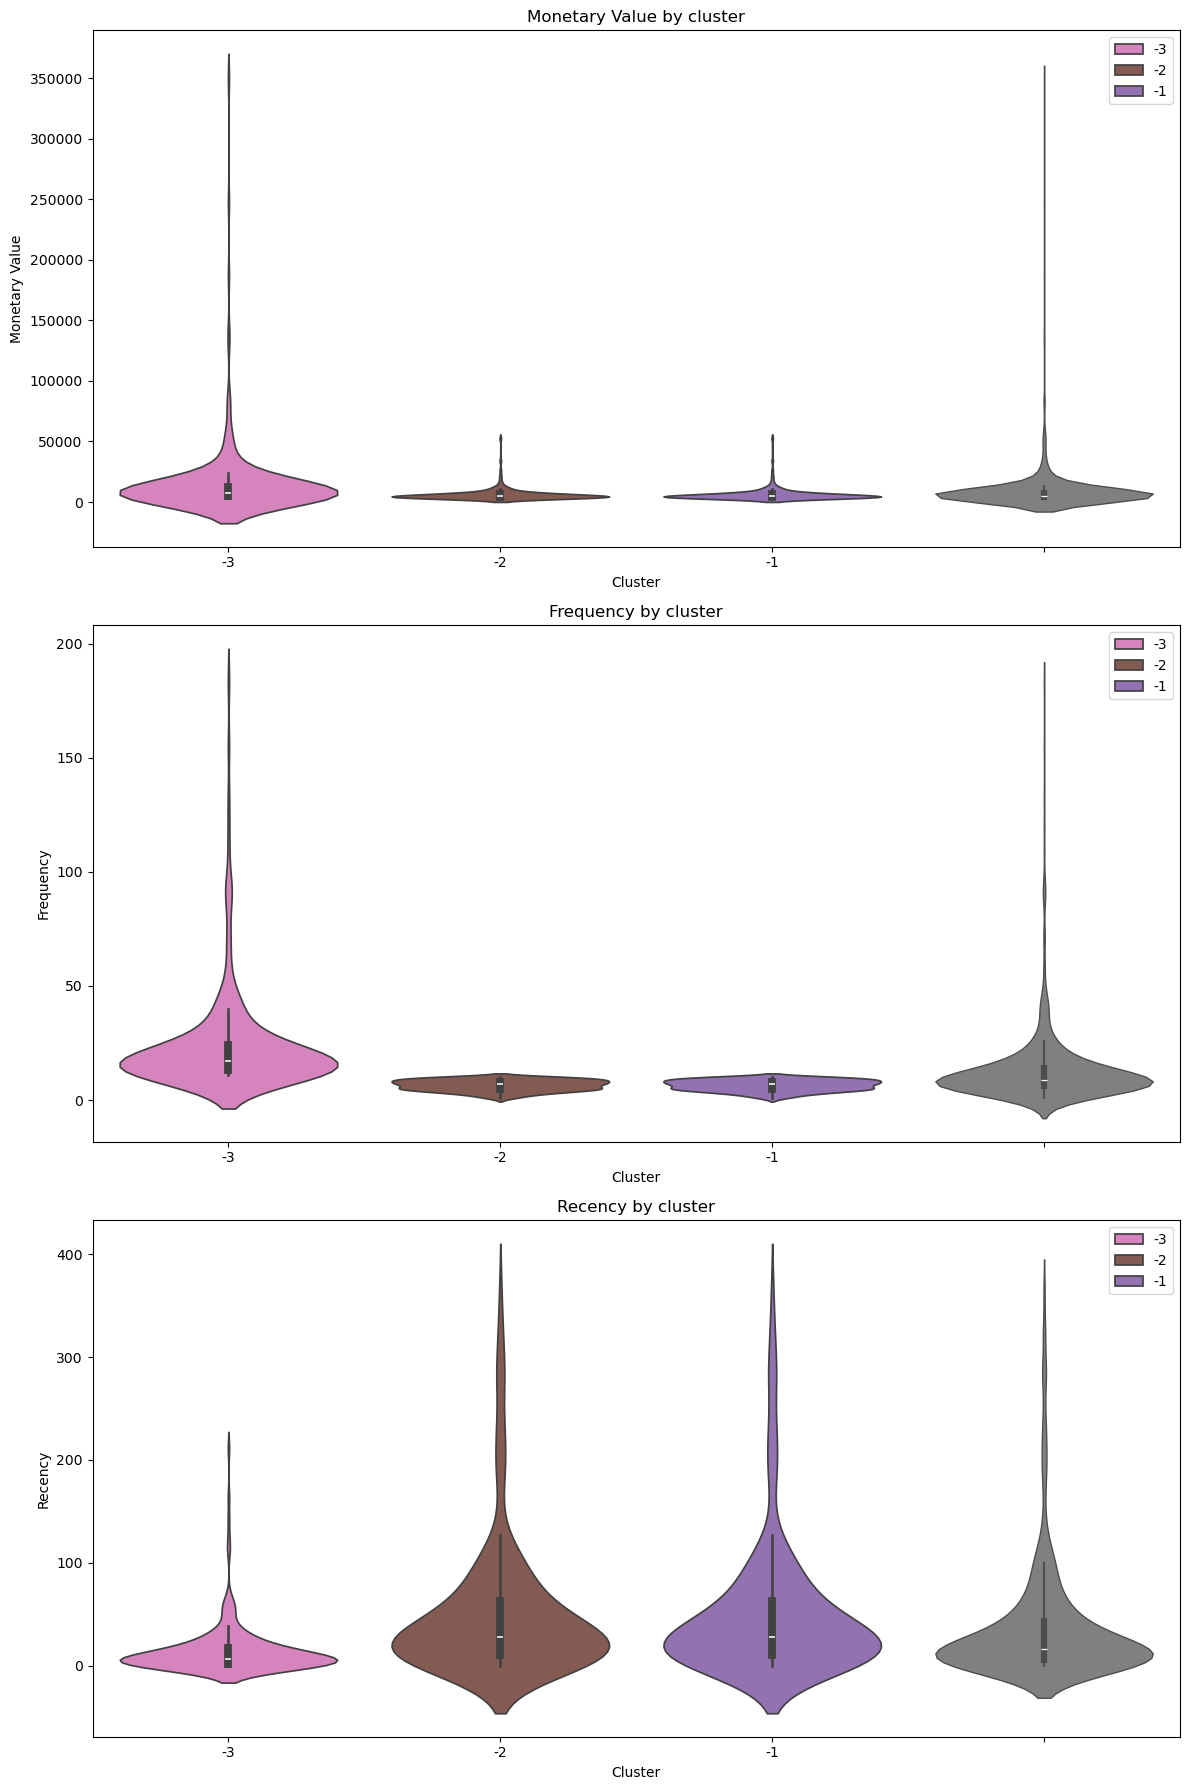

In [ ]:
cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['MonetaryValue'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['MonetaryValue'],color = 'gray',linewidth=1.0) # for refernce
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['Frequency'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['Frequency'],color = 'gray',linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['Recency'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['Recency'],color = 'gray',linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()



- **Cluster -1 (Monetary Outliers) PAMPER:** 
    1. Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
    2. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- **Cluster -2 (Frequency Outliers) UPSELL:** 
    1. Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. 
    2. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- **Cluster -3 (Monetary & Frequency Outliers) DELIGHT:**
    1. Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. 
    2. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [63]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [65]:
full_clustering_df = pd.concat([non_outliers_df, outliers_cluster_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14,-3


In [66]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3,REWARD
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3,REWARD
...,...,...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14,-3,DELIGHT


# Visualisation

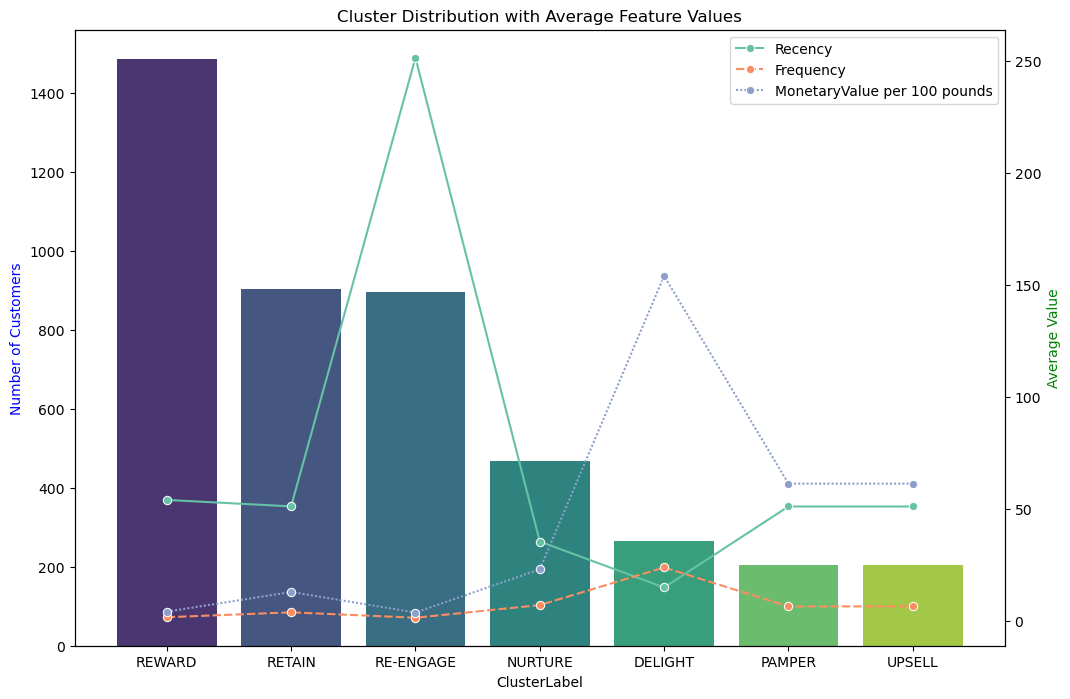

In [67]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()